['/Users/liujing/Documents/GitHub/PythonJupyter/TensorFlow/test2/tfrecord/traindata.tfrecords-001']


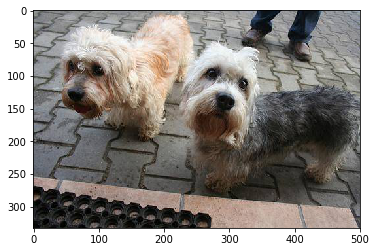

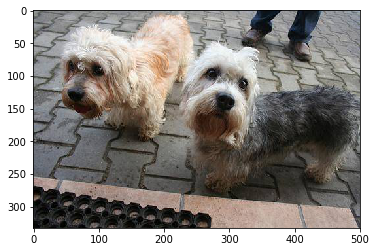

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 30 23:53:56 2017

@author: zhangxu
"""
import tensorflow as tf 
from PIL import Image  
import matplotlib.pyplot as plt

#写入图片路径
swd = '/Users/liujing/Documents/GitHub/PythonJupyter/TensorFlow/test2/tfrecord_toimage/'
#TFRecord文件路径
data_path = '/Users/liujing/Documents/GitHub/PythonJupyter/TensorFlow/test2/tfrecord/traindata.tfrecords-001'
# 获取文件名列表
data_files = tf.gfile.Glob(data_path)
print(data_files)
# 文件名列表生成器

filename_queue = tf.train.string_input_producer(data_files,shuffle=True) 
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)   #返回文件名和文件
features = tf.parse_single_example(serialized_example,
                                   features={
                                       'label': tf.FixedLenFeature([], tf.int64),
                                       'img_raw' : tf.FixedLenFeature([], tf.string),
                                       'img_width': tf.FixedLenFeature([], tf.int64),
                                       'img_height': tf.FixedLenFeature([], tf.int64),
                                   })  #取出包含image和label的feature对象
#tf.decode_raw可以将字符串解析成图像对应的像素数组
image = tf.decode_raw(features['img_raw'], tf.uint8)
height = tf.cast(features['img_height'],tf.int32)
width = tf.cast(features['img_width'],tf.int32)
label = tf.cast(features['label'], tf.int32)
channel = 3
image = tf.reshape(image, [height,width,channel])


with tf.Session() as sess: #开始一个会话
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    #启动多线程
    coord=tf.train.Coordinator()
    threads= tf.train.start_queue_runners(coord=coord)
    for i in range(2):
        #image_down = np.asarray(image_down.eval(), dtype='uint8')
        plt.imshow(image.eval())
        plt.show()
        single,l = sess.run([image,label])#在会话中取出image和label
        img=Image.fromarray(single, 'RGB')#这里Image是之前提到的
        img.save(swd+str(i)+'_''Label_'+str(l)+'.jpg')#存下图片
        #print(single,l)
    coord.request_stop()
    coord.join(threads)
